# Imports

In [17]:
import yfinance as yf

In [2]:
import matplotlib.pyplot as plt
import numpy as np
plt.style.use("ggplot")
import pandas as pd

In [3]:
def summary_ann(returns):
    summary = returns.agg(["mean", "std"]).T
    summary["Return"] = summary["mean"] * 252
    summary["Risk"] = summary["std"] * np.sqrt(252)
    summary.drop(columns = ["mean", "std"], inplace = True)
    return summary

# Gathering the Data

## Information on the 30 Dow Constituents

As of August 31, 2020, the Dow Jones Industrial Average consists of the following companies, with a weighting as of August 26, 2021.

In [10]:
const = pd.read_html("https://en.wikipedia.org/wiki/Dow_Jones_Industrial_Average")[1]
const.shape

(30, 7)

In [11]:
const[:1]

,Company,Exchange,Symbol,Industry,Date added,Notes,Index weighting
0,3M,NYSE,MMM,Conglomerate,1976-08-09,As Minnesota Mining and Manufacturing,3.62%


In [12]:
const = const.iloc[:, :5] #Exclude Notes and Index Weighting
const.rename(columns = {"Date added":"Date_Added"}, inplace = True)
const.Date_Added = pd.to_datetime(const.Date_Added)
const[:1]

,Company,Exchange,Symbol,Industry,Date_Added
0,3M,NYSE,MMM,Conglomerate,1976-08-09


In [13]:
const.to_csv("const.csv", index = False)

## Closing prices for DJI and its constituents from 2001 to 2021

In [42]:
# List of tickers 
tickers = " ".join(const.Symbol.tolist())

In [26]:
tickers[:13]

'MMM AXP AMGN '

In [45]:
const_prices = yf.download(tickers,start="2001-03-01",end="2021-03-01")["Close"]

[*********************100%***********************]  30 of 30 completed


In [ ]:
const_prices.to_csv("\Data\const_prices.csv")

In [46]:
const_prices.head(3)

,AAPL,AMGN,AXP,BA,CAT,CRM,CSCO,CVX,DIS,DOW,GS,HD,HON,IBM,INTC,JNJ,JPM,KO,MCD,MMM,MRK,MSFT,NKE,PG,TRV,UNH,V,VZ,WBA,WMT
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2001-01-02,0.265625,62.8750,45.515598,62.0000,23.15625,NaN,33.3125,42.96875,27.560345,NaN,100.25,45.5625,42.186600,84.8125,31.062500,51.0000,44.000,30.40625,33.5000,59.59375,88.740456,21.68750,6.765625,39.25000,51.375,14.734375,NaN,45.190968,40.8125,53.8750
2001-01-03,0.292411,67.0625,48.962093,62.5625,23.25000,NaN,41.3125,41.31250,30.643156,NaN,115.50,51.4375,45.880909,94.6250,34.234375,49.3750,50.625,29.62500,33.6875,58.90625,85.042938,23.96875,6.992188,37.31250,50.875,14.296875,NaN,47.776520,39.2500,58.4375
2001-01-04,0.304688,62.6875,47.430321,61.0000,24.34375,NaN,41.8750,40.43750,31.506344,NaN,112.75,51.6875,45.821323,93.1875,33.796875,48.3125,52.000,28.78125,33.0000,59.50000,81.106873,24.21875,7.171875,36.15625,48.500,13.296875,NaN,49.181713,37.3125,56.1875


In [74]:
dji = yf.download("^DJI",start="2001-03-01",end="2021-03-01")["Close"]
dji.to_csv("\Data\dji.csv")

[*********************100%***********************]  1 of 1 completed


Final DataFrame that includes relevant information

In [75]:
df = pd.concat([const_prices, dji], axis = 1)
df.rename(columns = {"Close": "DJI"}, inplace = True)

In [76]:
df.head(2)

,AAPL,AMGN,AXP,BA,CAT,CRM,CSCO,CVX,DIS,DOW,GS,HD,HON,IBM,INTC,JNJ,JPM,KO,MCD,MMM,MRK,MSFT,NKE,PG,TRV,UNH,V,VZ,WBA,WMT,DJI
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2001-01-02,0.265625,62.8750,45.515598,62.0000,23.15625,NaN,33.3125,42.96875,27.560345,NaN,100.25,45.5625,42.186600,84.8125,31.062500,51.000,44.000,30.40625,33.5000,59.59375,88.740456,21.68750,6.765625,39.2500,51.375,14.734375,NaN,45.190968,40.8125,53.8750,NaN
2001-01-03,0.292411,67.0625,48.962093,62.5625,23.25000,NaN,41.3125,41.31250,30.643156,NaN,115.50,51.4375,45.880909,94.6250,34.234375,49.375,50.625,29.62500,33.6875,58.90625,85.042938,23.96875,6.992188,37.3125,50.875,14.296875,NaN,47.776520,39.2500,58.4375,NaN


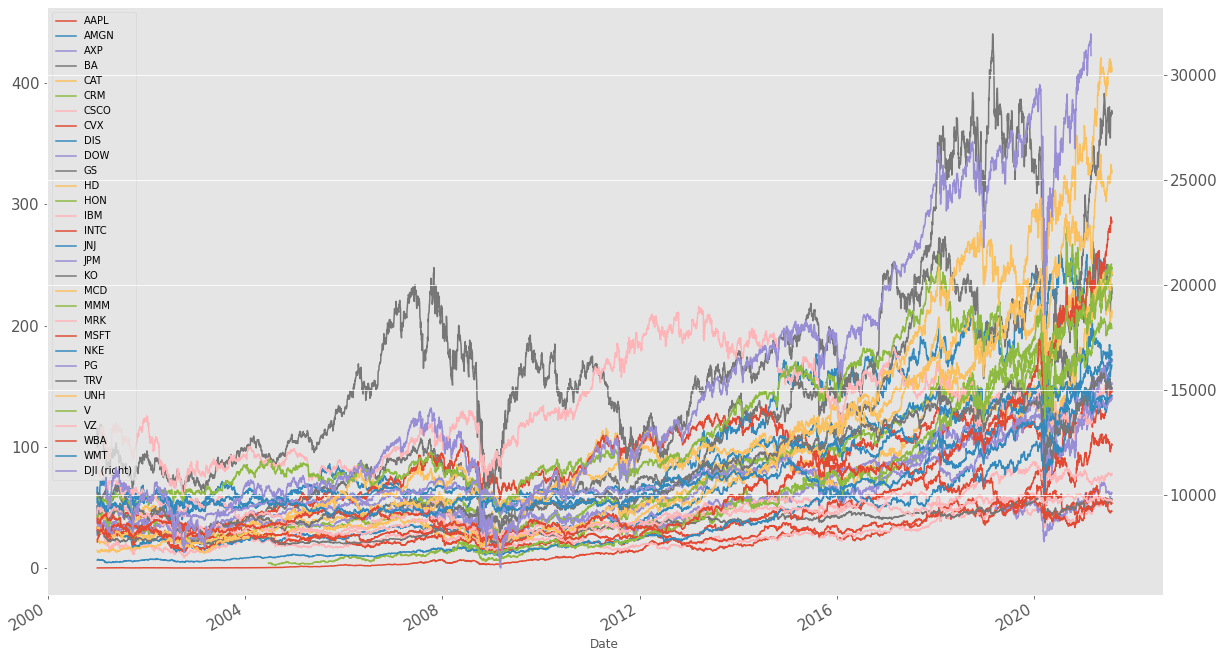

In [77]:
df.plot(figsize = (20, 12), fontsize = 15, secondary_y = "DJI")
plt.show()

# Additional Transformation

Want a DF that contains the mean annual  risk and return for each firm on the DOW

In [78]:
#Normalize the data 

norm = df.div(df.iloc[0]).mul(100) 
norm.head(2)

,AAPL,AMGN,AXP,BA,CAT,CRM,CSCO,CVX,DIS,DOW,GS,HD,HON,IBM,INTC,JNJ,JPM,KO,MCD,MMM,MRK,MSFT,NKE,PG,TRV,UNH,V,VZ,WBA,WMT,DJI
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2001-01-02,100.000000,100.00000,100.000000,100.000000,100.000000,NaN,100.000000,100.000000,100.000000,NaN,100.00000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,NaN,100.000000,100.000000,100.000000,NaN
2001-01-03,110.084141,106.66004,107.572119,100.907258,100.404858,NaN,124.015009,96.145455,111.185678,NaN,115.21197,112.894376,108.757068,111.569639,110.211268,96.813725,115.056818,97.430627,100.559701,98.846356,95.833335,110.518732,103.348737,95.063694,99.026764,97.030753,NaN,105.721392,96.171516,108.468677,NaN


In [79]:
# Calculate returns 
ret = df.pct_change()

In [80]:
summary = summary_ann(ret)
summary.head()

,Return,Risk
AAPL,0.374059,0.365506
AMGN,0.107792,0.291643
AXP,0.129199,0.361443
BA,0.122888,0.345536
CAT,0.157514,0.318927


In [81]:
summary = summary.merge(const.loc[:, ["Symbol", "Company"]],
                        how = "left", left_index= True, right_on = "Symbol")
summary.set_index("Company", inplace = True)
summary.rename(index = {np.nan : "Dow Jones"}, inplace = True)
summary.head(3)

,Return,Risk,Symbol
Company,,,
Apple Inc.,0.374059,0.365506,AAPL
Amgen,0.107792,0.291643,AMGN
American Express,0.129199,0.361443,AXP


# Explanatory Data Analysis

In [85]:
summary

,Return,Risk,Symbol
Company,,,
Apple Inc.,0.374059,0.365506,AAPL
Amgen,0.107792,0.291643,AMGN
American Express,0.129199,0.361443,AXP
Boeing,0.122888,0.345536,BA
Caterpillar Inc.,0.157514,0.318927,CAT
Salesforce,0.326889,0.427551,CRM
Cisco Systems,0.089560,0.360955,CSCO
Chevron Corporation,0.080807,0.278319,CVX
The Walt Disney Company,0.134180,0.296792,DIS


## Sorted Risk v Return Visualizations

In [83]:
summary_const = summary.drop(index = ["Dow Inc.","Dow Jones"])

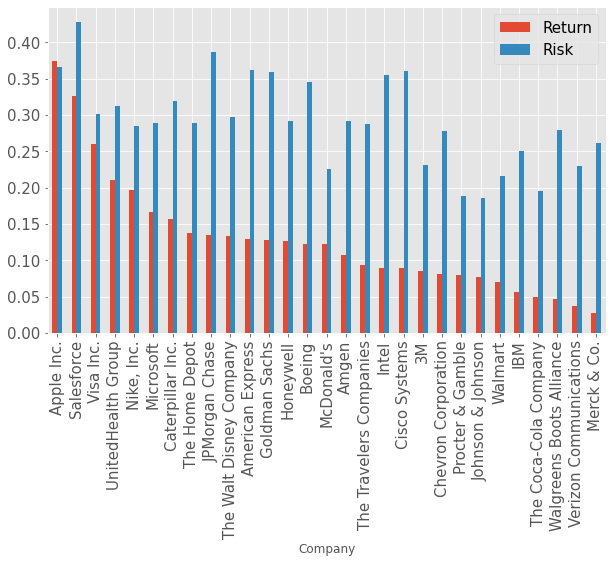

In [84]:
#Sorting by Return

summary_const.sort_values(by = "Return", ascending = False).plot(kind = "bar", figsize = (10, 6), 
                                                            fontsize = 15)
plt.legend(fontsize = 15)
plt.show()

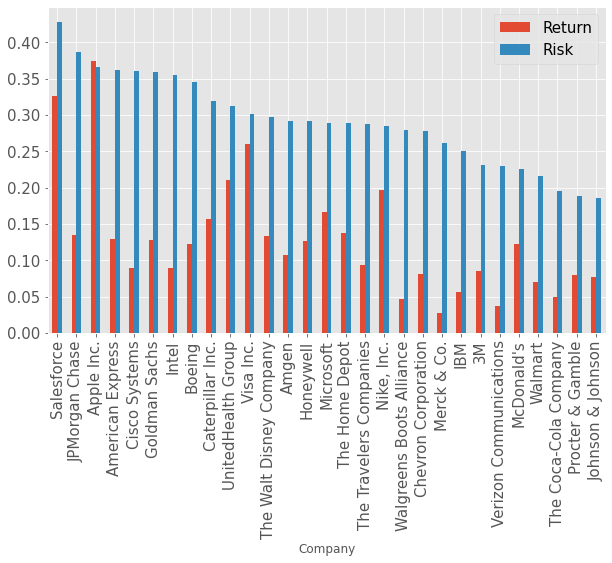

In [87]:
#Sorting by Risk 

summary_const.sort_values(by = "Risk", ascending = False).plot(kind = "bar", figsize = (10,6), 
                                                          fontsize = 15)
plt.legend(fontsize = 15)
plt.show()

In [88]:
summary_const.set_index("Symbol", inplace = True)

## Correlations

In [89]:
corr_matrix = ret.corr()
corr_matrix.iloc[:5,:5]

,AAPL,AMGN,AXP,BA,CAT
AAPL,1.000000,0.322668,0.402544,0.329540,0.399823
AMGN,0.322668,1.000000,0.362095,0.313552,0.342560
AXP,0.402544,0.362095,1.000000,0.533913,0.572415
BA,0.329540,0.313552,0.533913,1.000000,0.505986
CAT,0.399823,0.342560,0.572415,0.505986,1.000000


In [91]:
import seaborn as sns

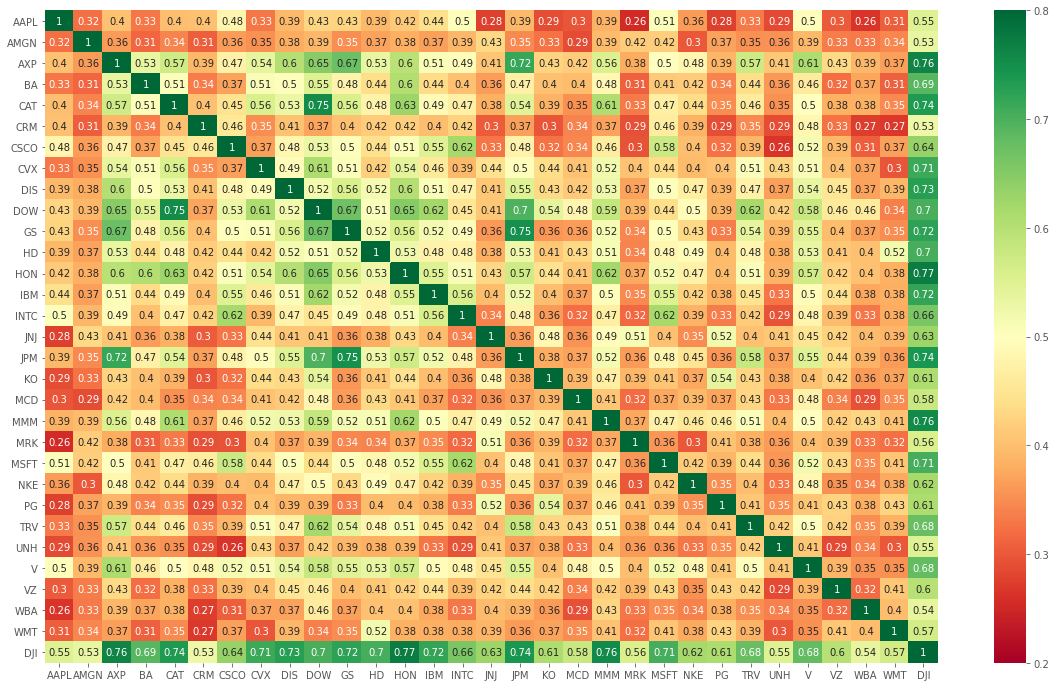

In [92]:
#Variable Correlations

plt.figure(figsize = (20, 12))
sns.heatmap(corr_matrix, cmap='RdYlGn',annot=True, vmin = 0.2, vmax = 0.8)
plt.show()

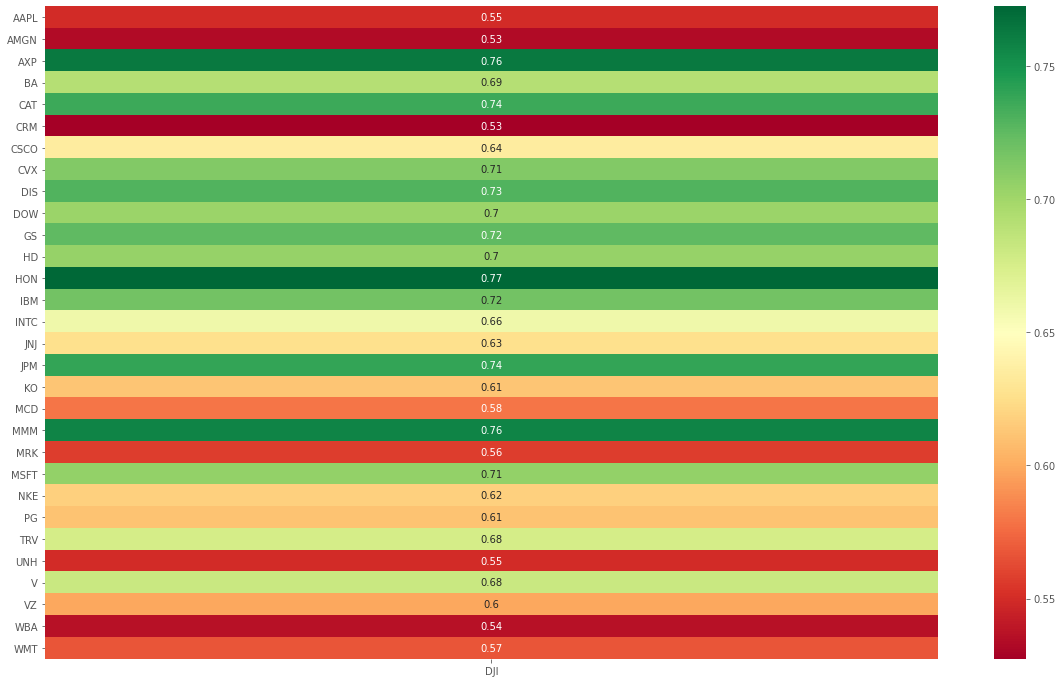

In [93]:
# Correlations with DJI

plt.figure(figsize = (20, 12))
s = pd.DataFrame(corr_matrix['DJI']).drop('DJI')
sns.heatmap(s, cmap='RdYlGn',annot=True, vmin = s.min(), vmax = s.max())
plt.show()

# Index Tracking 

Procedure: 

* Track the DJI with a portfolio of 10 Stocks
* Stocks selected by minimizing the individual trackering in a training period of 2010-2018 
* Subsequently, weights determined through optimization 
* Testing period is on 2019

In [94]:
df2 = df.loc["2010":"2018"].copy()

In [95]:
norm2 = df2.div(df2.iloc[0]).mul(100)

In [96]:
ret2 = ret.loc["2010":"2018"].copy()

In [97]:
ret_diff = ret2.sub(ret2.DJI, axis = 0) #how close a stocks returns were to those of dji 
ret_diff.head(3)

,AAPL,AMGN,AXP,BA,CAT,CRM,CSCO,CVX,DIS,DOW,GS,HD,HON,IBM,INTC,JNJ,JPM,KO,MCD,MMM,MRK,MSFT,NKE,PG,TRV,UNH,V,VZ,WBA,WMT,DJI
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2010-01-04,0.000614,0.005378,-0.005079,0.022921,0.012422,-0.000718,0.016377,0.011936,-0.020532,NaN,0.010162,-0.023938,0.014386,-0.003110,0.008578,-0.010759,0.013367,-0.014249,-0.009506,-0.010717,-0.002088,0.000469,-0.025849,-0.006869,-0.015954,0.019498,-0.007176,-0.010423,0.000844,-0.000358,0.0
2010-01-05,0.002857,-0.007534,-0.001071,0.033880,0.013084,-0.003149,-0.003327,0.008211,-0.001366,NaN,0.018808,0.008453,0.003111,-0.010952,0.000649,-0.010467,0.020498,-0.010969,-0.006518,-0.005135,0.005181,0.001451,0.005107,0.001455,-0.022562,-0.000458,-0.010331,0.002931,-0.006915,-0.008829,0.0
2010-01-06,-0.016063,-0.007672,0.016008,0.030177,0.002881,-0.001902,-0.006666,-0.000032,-0.005471,NaN,-0.010830,-0.003620,-0.000157,-0.006653,-0.003511,0.007977,0.005337,-0.000512,-0.013801,0.014025,0.013298,-0.006294,-0.006254,-0.004900,-0.014346,0.009691,-0.013585,-0.042749,-0.007725,-0.002392,0.0


In [102]:
ret_diff.drop("DOW",axis=1,inplace=True)

## Selecting the Tracking Stocks

In this context: 
* Premium is the mean annual difference in returns
* Tracking error is the mean deviation in the difference


Again, recall,  the goal is to minimize the tracking error. 


In [103]:
def tracking_ann(returns):
    summary = returns.agg(["mean", "std"]).T
    summary["Premium"] = summary["mean"] * 252
    summary["TE"] = summary["std"] * np.sqrt(252)
    summary.drop(columns = ["mean", "std"], inplace = True)
    return summary


In [106]:
tracking = tracking_ann(ret_diff)

In [107]:
tracking.sort_values(by = "TE").head()

,Premium,TE
DJI,0.000000,0.000000
MMM,0.010632,0.110264
JNJ,-0.011258,0.119209
HON,0.062228,0.121476
TRV,0.013815,0.127052


Select DJI and Top Ten closest stocks (lowest TE)

In [108]:
noa = 10
tracking_stocks = tracking.sort_values(by = "TE").index[:noa+1]

In [109]:
tracking_stocks

Index(['DJI', 'MMM', 'JNJ', 'HON', 'TRV', 'KO', 'PG', 'MCD', 'IBM', 'DIS',
       'HD'],
      dtype='object')

In [110]:
norm_track = norm2.loc[:, tracking_stocks] #Normalized Returns of Tracking Stocks and DJI

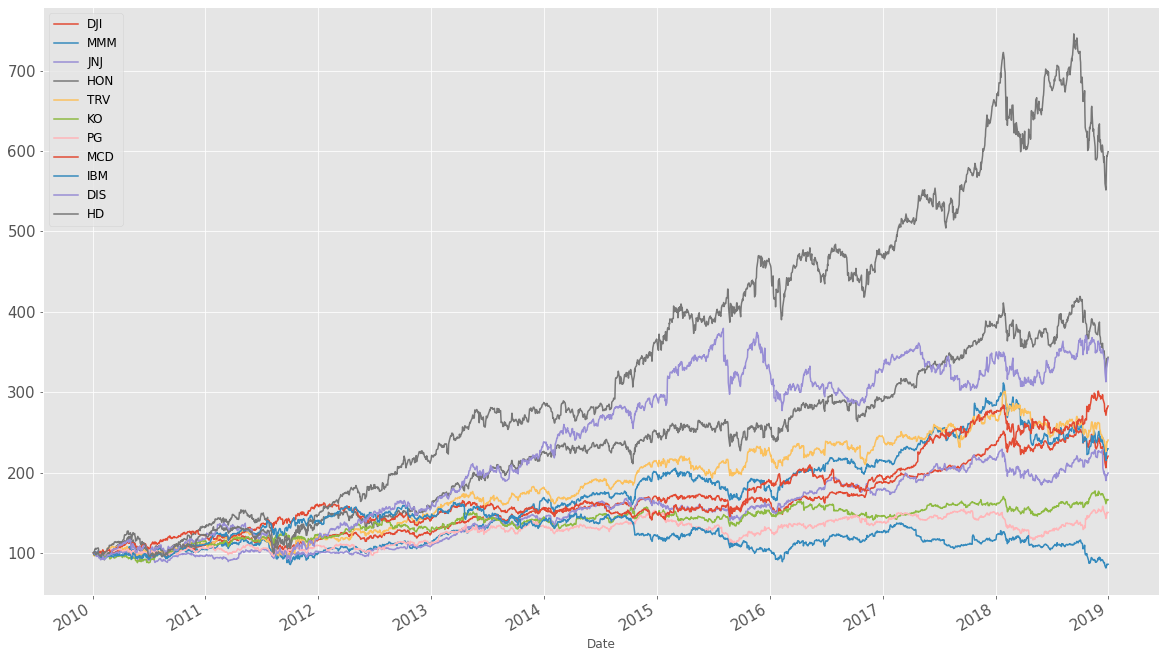

In [111]:
norm_track.plot(figsize = (20, 12), fontsize = 15)
plt.legend(fontsize = 12)
plt.show()

In [112]:
tracking_stocks = tracking_stocks[1:] #all but dji

##  A Simple Tracking Portfolio

Here we assign equal weights to each of the 10 stocks

In [ ]:
tracking_stocks

Index(['MMM', 'JPM', 'PFE', 'V', 'AXP', 'RTX', 'KO', 'HD', 'XOM', 'TRV'], dtype='object')

In [115]:
#Equal weights (starting point of optimization)

eweights = np.full(noa, 1/noa)
eweights

array([0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1])

In [113]:
#Calculate portfolio returns (MMM return * (1/10) + JPM return * (1/10) ... for each day)

def port_ret(weights):
    return ret2.loc[:, tracking_stocks].dot(weights)

In [116]:
#Define function to be minimized -> want to minimize tracking error of portfolio

def tracking_error(weights): 
     return port_ret(weights).sub(ret2.DJI).std() * np.sqrt(252)

The tracking error of equal a uniform weight distribution: 

In [117]:
tracking_error(eweights)

0.04534188736241638

Determining and Visualizing Normalized Returns of Simple Portfolio

In [118]:
ew_port = port_ret(eweights)[1:].add(1).cumprod().mul(100)
ew_port.head()

Date
2010-01-05    99.337685
2010-01-06    99.080523
2010-01-07    99.430738
2010-01-08    99.601014
2010-01-11    99.375094
dtype: float64

In [119]:
norm_track["EW_Port"] = ew_port
norm_track.iloc[0, -1] = 100

In [123]:
norm_track[["DJI","MMM","EW_Port"]].head()

,DJI,MMM,EW_Port
Date,,,
2010-01-04,100.000000,100.000000,100.000000
2010-01-05,99.887184,99.373649,99.337685
2010-01-06,99.902869,100.782946,99.080523
2010-01-07,100.216369,100.855224,99.430738
2010-01-08,100.323418,101.565891,99.601014


Portofolio Vs DJI

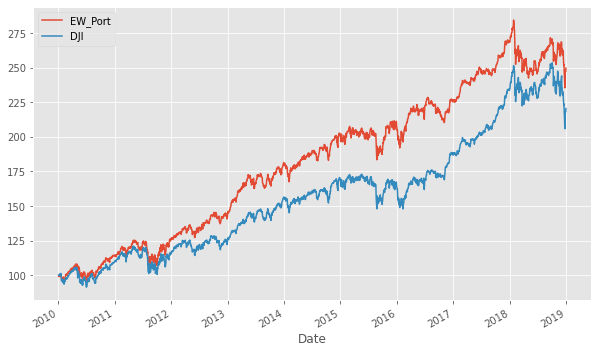

In [124]:
norm_track[["EW_Port", "DJI"]].plot(figsize = (10,6))
plt.legend(loc = 2)
plt.show()

## Find the Optimized Weights

In [128]:
import scipy.optimize as sco 

In [127]:
#Constraint: weights must sum up to 1 <-> sum of weights - 1 = 0

cons = ({"type": "eq", "fun": lambda x: np.sum(x) - 1})
cons

{'fun': <function __main__.<lambda>>, 'type': 'eq'}

In [129]:
#Bounds: all weights shall be between 0 and 1 ( can be changed)
bnds =  tuple((0,1) for x in range(noa))
bnds

((0, 1),
 (0, 1),
 (0, 1),
 (0, 1),
 (0, 1),
 (0, 1),
 (0, 1),
 (0, 1),
 (0, 1),
 (0, 1))

In [130]:
#Run optimization based on function to be minimized, starting with equal 
# weights and based on respective bounds and constraints

opts = sco.minimize(tracking_error, eweights, method = "SLSQP", bounds = bnds, constraints= cons)

In [131]:
#output of optimization
opts

     fun: 0.041415154032926484
     jac: array([0.00461552, 0.00463313, 0.00453492, 0.00445022, 0.00459684,
       0.00435946, 0.00461851, 0.00441593, 0.00445559, 0.00449066])
 message: 'Optimization terminated successfully.'
    nfev: 84
     nit: 7
    njev: 7
  status: 0
 success: True
       x: array([0.15255414, 0.10748743, 0.14563197, 0.09533354, 0.03051286,
       0.05376698, 0.07925171, 0.1440028 , 0.10067981, 0.09077877])

Optimal Weights

In [132]:
optimal_weights = opts["x"]
optimal_weights

array([0.15255414, 0.10748743, 0.14563197, 0.09533354, 0.03051286,
       0.05376698, 0.07925171, 0.1440028 , 0.10067981, 0.09077877])

In [133]:
pd.Series(index = tracking_stocks, data = optimal_weights)

MMM    0.152554
JNJ    0.107487
HON    0.145632
TRV    0.095334
KO     0.030513
PG     0.053767
MCD    0.079252
IBM    0.144003
DIS    0.100680
HD     0.090779
dtype: float64

Normalized Returns using Optimized Weights

In [135]:
opt_port = port_ret(optimal_weights)[1:].add(1).cumprod().mul(100)
opt_port.head(3)

Date
2010-01-05    99.354517
2010-01-06    99.210767
2010-01-07    99.641594
dtype: float64

In [136]:
norm_track["Opt_Port"] = opt_port
norm_track.iloc[0, -1] = 100

In [137]:
norm_track[["DJI","MMM","EW_Port"]].head()

,DJI,MMM,EW_Port
Date,,,
2010-01-04,100.000000,100.000000,100.000000
2010-01-05,99.887184,99.373649,99.337685
2010-01-06,99.902869,100.782946,99.080523
2010-01-07,100.216369,100.855224,99.430738
2010-01-08,100.323418,101.565891,99.601014


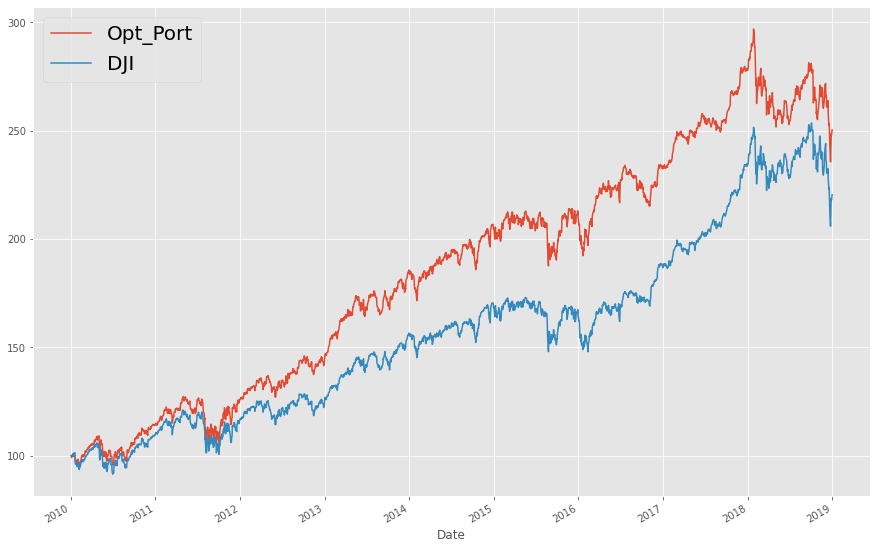

In [138]:
norm_track[["Opt_Port", "DJI"]].plot(figsize = (15, 10))
plt.legend(fontsize = 20, loc = 2)
plt.show()

In [139]:
summary_ann(norm_track[["Opt_Port", "EW_Port", "DJI"]].pct_change())

,Return,Risk
Opt_Port,0.111678,0.137548
EW_Port,0.110270,0.129491
DJI,0.098157,0.142272


# Forward Testing

## Testing optimal weights and stocks on Test Period 

In [ ]:
tracking_stocks

Index(['MMM', 'JPM', 'PFE', 'V', 'AXP', 'RTX', 'KO', 'HD', 'XOM', 'TRV'], dtype='object')

In [141]:
# Generalized Tracking Error - function to determine tracking error of 
# weight sum of stocks against any index across any period

def tracking_error_gen(data, tracking_stocks, weights, index, start, end):
    return data.loc[start:end, tracking_stocks].dot(weights).sub(ret.loc[start:end, index]).std() * np.sqrt(252)   

In [142]:
#Visualizations

def visual(data, tracking_stocks, weights, index, start, end):
    track = data.loc[start:end, tracking_stocks].dot(weights).add(1).cumprod().mul(100)
    track.name = "Portfolio"
    index = data.loc[start:end, index].add(1).cumprod().mul(100)
    plt.figure(figsize = (12,8))
    track.plot()
    index.plot()
    plt.legend(fontsize = 20, loc = 2)
    plt.show()

Training Tracking Error

In [143]:
tracking_error_gen(ret, tracking_stocks, optimal_weights, "DJI", "2010-01-01", "2018-12-31")

0.041415154032926484

Test Tracking Error

In [158]:
forward_te = tracking_error_gen(ret, tracking_stocks, optimal_weights, "DJI", 
                                "2019-01-01", "2019-12-31")
forward_te

0.05746711368289249

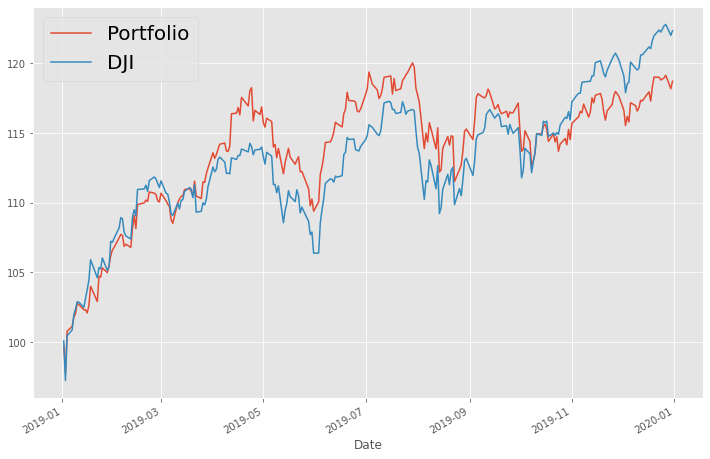

In [147]:
visual(ret, tracking_stocks, optimal_weights, "DJI", "2019-01-01", "2019-12-31")

## Comparing Optimal weights to random weights on random stocks

Goal: Determine if success seen by our weights is significant or no different than what one would expect in a random process

In [148]:
bucket = df.columns.drop(["DOW", "DJI"])
bucket

Index(['AAPL', 'AMGN', 'AXP', 'BA', 'CAT', 'CRM', 'CSCO', 'CVX', 'DIS', 'GS',
       'HD', 'HON', 'IBM', 'INTC', 'JNJ', 'JPM', 'KO', 'MCD', 'MMM', 'MRK',
       'MSFT', 'NKE', 'PG', 'TRV', 'UNH', 'V', 'VZ', 'WBA', 'WMT'],
      dtype='object')

### Run Once

In [149]:
#Random Stocks and Random Weights

np.random.seed(123)
random_stocks = np.random.choice(bucket, size = noa, replace = False)
random_numbers = np.random.random(noa)
random_weights = random_numbers / random_numbers.sum()

In [150]:
print(random_stocks, random_weights)

['CVX' 'WMT' 'CRM' 'V' 'DIS' 'VZ' 'IBM' 'NKE' 'HON' 'PG'] [0.0858475  0.05974735 0.098733   0.14853474 0.07177554 0.08370995
 0.13136476 0.07500036 0.04705319 0.19823361]


In [151]:
tracking_error_gen(ret, random_stocks, random_weights, "DJI", "2019-01-01", "2019-12-31")

0.06533266810469845

In [152]:
forward_te

0.05746711368289249

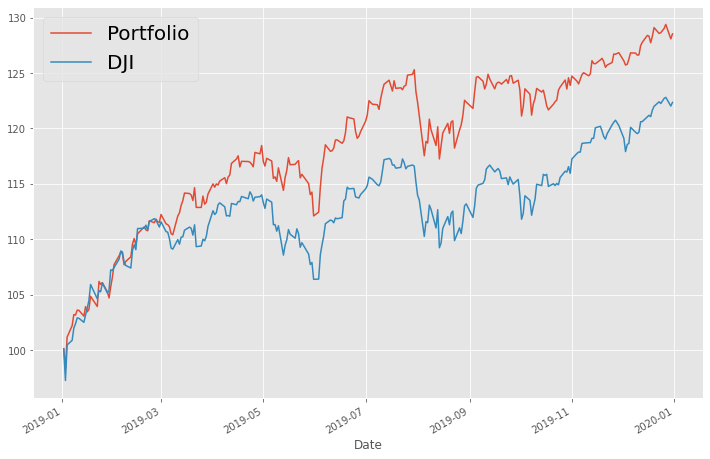

In [153]:
visual(ret, random_stocks, random_weights, "DJI", "2019-01-01", "2019-12-31")

### Run 10000 times


This process 10000 times to see how often optimal weights outperform random

In [154]:
tes = np.empty(10000)
np.random.seed(123)
for i in range(10000):
    random_numbers = np.random.random(noa)
    random_weights = random_numbers / random_numbers.sum()
    random_stocks = np.random.choice(bucket, size = noa, replace = False)
       
    tes[i] = tracking_error_gen(ret, random_stocks, random_weights, "DJI", "2019-01-01", "2019-12-31")

37% of the time random is better

In [166]:
(tes < forward_te).mean()

0.3796

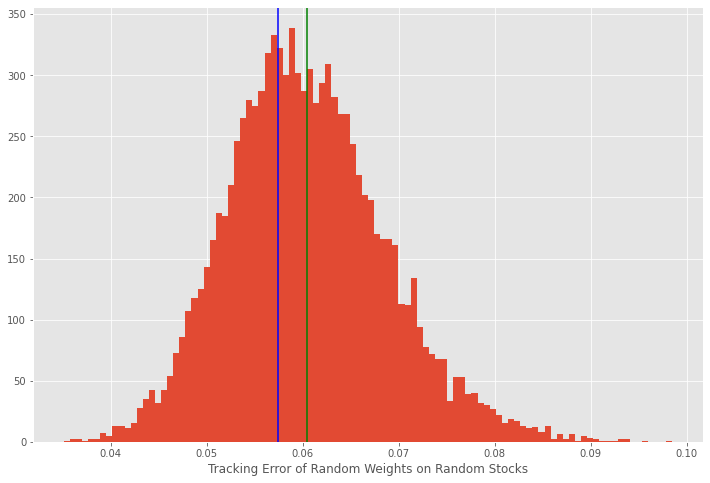

In [169]:
plt.figure(figsize = (12, 8))
plt.hist(tes, bins = 100)
plt.xlabel("Tracking Error of Random Weights on Random Stocks")
plt.axvline(x=forward_te,color='b')
plt.axvline(x=tes.mean(),color='g')
plt.show()